<a href="https://colab.research.google.com/github/RaivoKasepuu/BDA_Tartu_MTAT_03_319/blob/master/BDA_lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  Business Data Analytics - Practice Session_04  </font></center></h1>
<h2><center> <font color='black'> Customer lifecycle management - regression</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>
</div>

## Introduction

1. <font size="2">Business relationships with the customers are not **static** – they change over time. It is crucial for the company to understand these dynamic processes.</font>


2. <font size="2">The customer relationship management **(CRM)** is a huge area that encompasses multiple practices, directions, and approaches related to customer interactions with the business.</font>


3. <font size="2">One of the central directions is the **Customer Lifecycle Value (CLV)**,which represents the expected revenue earned from customer over their lifetime and this is the topic of today's session. **We will illustrate two different approaches to study the** </font>

    * <font size="2">The first approach that we will study is based on **heuristics**, where we do not use any automatic methods, but a fairly simple analysis in order to calculate Customer Lifetime Value (CLV). </font>      
        
    * <font size="2">Then, we will learn how to use **simple and multiple linear regressions** in the context of CRM. We will follow the **machine learning** practices discussed during the lecture.</font>



## What are we actually doing?

Source: https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3

Machine learning tasks can be gathered into the four following categories:

![picture](https://miro.medium.com/max/700/1*vJsXYNlr_GyFc2qrpZGsvA.png)

## What is regression?

Regression is the statistical approach to find the relationship between variables. Hence, the Linear Regression assumes a linear relationship between variables.

The most common model in regression analysis is [linear regression](https://en.wikipedia.org/wiki/Linear_regression). This model finds the relationship between the independent and dependent variables by fitting a linear equation. 

Simple linear is an approach for predicting the quantitative response Y based on single predictor variable X.

![picture](https://miro.medium.com/max/175/1*9UifhcxvAiTTQI8nU0ymGw.png)

This is the equation of straight-line having slope β1 and intercept β0. Read [this](https://towardsdatascience.com/the-complete-guide-to-linear-regression-analysis-38a421a89dc2) article for more.

Simply, the whole idea of the linear Regression is to find the best fit line,which has very low error(cost function).
This line is also called Least Square Regression Line(LSRL).

####Properties of the Regression line:
1. The line minimizes the sum of squared difference between the observed values(actual y-value) and the predicted value(ŷ value)
2. The line passes through the mean of independent and dependent features.

![picture](https://miro.medium.com/max/602/1*FLgxx9NbqgHT0sqfz-DBaA.png)

Deep-dive into Linear Regression: https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0

## Ok, so what are the steps?

<img src="https://i.ibb.co/6Zzq2dC/Regression-steps.png">

Check [this article](https://gogul.dev/software/first-neural-network-keras) to see what are the steps of training a model in Machine Learning.

## 1. Let’s install & load the required packages:

![picture](https://i.ibb.co/3dccMTC/Regression-steps-1.png)

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)

## 2. Read customer transaction dataset

![picture](https://i.ibb.co/YPMtBVs/Regression-steps-2.png)

In [ ]:
# read customer transaction data using pandas package as a dataframe
df = pd.read_csv("lab_04_clv_transactions.csv")

# get the first 10 rows from the df
df.head(10)

,transaction_id,transaction_date,customer_id,amount
0,1,2012-09-04,1,20.96
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94
5,6,2013-01-23,2,12.37
6,7,2014-03-09,2,1.59
7,8,2013-11-17,2,2.75
8,9,2014-10-10,2,3.51
9,10,2012-11-26,3,21.58


**CLV transaction dataset contains four column as follow:**
* **transaction_id** - unique ID of some transaction;
* **transaction_date** - date when transaction was executed;
* **customer_id** - unique ID of the customer;
* **amount** - total amount of money that were transfered.


In [ ]:
# get info about our df
df.info()

# summary statistics 
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    4181 non-null   int64  
 1   transaction_date  4181 non-null   object 
 2   customer_id       4181 non-null   int64  
 3   amount            4181 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 130.8+ KB
       transaction_id  customer_id       amount
count     4181.000000  4181.000000  4181.000000
mean      2091.000000   516.332217     8.067426
std       1207.095067   291.209738     6.007071
min          1.000000     1.000000     0.010000
25%       1046.000000   270.000000     3.310000
50%       2091.000000   522.000000     6.880000
75%       3136.000000   762.000000    11.690000
max       4181.000000  1000.000000    38.350000


## <font color='black'> 3.1 Customer Lifecycle Value:</font>

<font size="2">Our goal here is to calculate **CLV**, which is the expected revenue earned from custmer over their lifetime during the entire relationship with the company. CLV is a metric that can be used for many different purposes:</font>

* <font size="2">Estimation of the customer value in order to target the most valuable ones.
* <font size="2">Reference for the markieting campaigns: how much to spend or whether to spend? and monitoring the impact of such campaign.
* <font size="2">Measurement of customer loyalty.
* <font size="2">Optimization of resource allocation.
* <font size="2">etc..
   

<font size="2">There are many methodologies of CLV, which can be very complex and include all the details taking into account all the spendings. More generally.  **CLV can be divided into two broad categoris:**</font>
1. <font size="2">**Historical CLV**:  where we do not use any automatic methods, but a fairly simple analysis in order to calculate Customer Lifetime Value (CLV).</font>

2. <font size="2">**Predictive CLV**: where we perform machine learning methods to apply predictive modles.</font>

<font size="2">Let us take the simple approach and calculate the historical value.</font>



## Start with the simple approach and calculate the historical value.

**CLV** is the cumulative spending per customer over time divided by amount of new customers each year

![picture](https://i.ibb.co/TqMdTsw/Regression-steps-3-1.png)

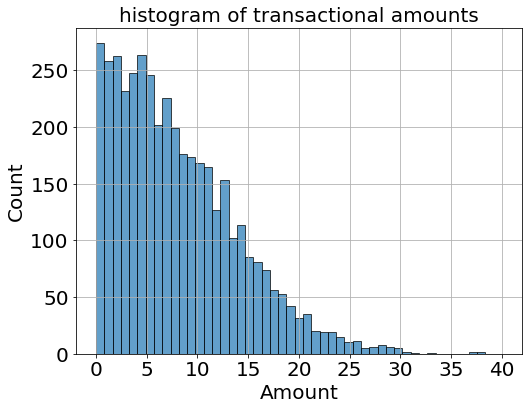

In [ ]:
# histogram of transactional amounts
# Plot the distribution of all amounts that different customers spent
# with different transactions. 

# set figure properties
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

# histogram bins 
# linspace returns evenly spaced numbers over a specified interval
bins = np.linspace(0, 40)

# set titles for figure, x, y
plt.title('histogram of transactional amounts',fontsize=20)
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Count',fontsize=20)


# plot histogram using plt.hist()
plt.hist(df.amount, bins, alpha=0.7, histtype='bar', ec='black')

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

**Let’s keep the raw dataset unchanged and create a new dataset, where we start to collect required features about active customers:**
1. customers_unique
2. transactions_unique 	
3. amount 	
4. cumulative_amount
5. customer retention rate
6. transactions per customer
7. amount per transaction

* get the year only from the transaction_date feature.

In [ ]:
def f(x):
    return 3*x+1

# Lambda expression is anonymous function
# function without a name
# lambda input: return_value
g = lambda x: 3*x +1

In [ ]:
print(f(2))
print(g(2))

7
7


In [ ]:
df.head()

,transaction_id,transaction_date,customer_id,amount
0,1,2012-09-04,1,20.96
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94


In [ ]:
# copy the original df
df_year = df 

# we take only year
df_year['year'] = df_year.transaction_date.apply(lambda x: pd.to_datetime(x).date().year) 
df_year.head()

,transaction_id,transaction_date,customer_id,amount,year
0,1,2012-09-04,1,20.96,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2014
3,4,2014-10-24,2,10.48,2014
4,5,2012-10-13,2,3.94,2012


* getting sample form the dataframe to check the timespan.

In [ ]:
# take IDs of 10 random customers
# Get unique values from a list
# using sample() function
sample_customers = pd.Series(df_year.customer_id.unique()).sample(10).values 

# create new sample
df_sample = df_year[df_year.customer_id.isin(sample_customers)] 
df_sample

,transaction_id,transaction_date,customer_id,amount,year
565,566,2012-02-20,137,5.71,2012
1663,1664,2010-11-02,412,10.65,2010
1664,1665,2012-10-03,412,2.34,2012
1665,1666,2011-02-03,412,18.40,2011
1666,1667,2013-09-29,412,8.37,2013
...,...,...,...,...,...
3527,3528,2012-04-22,860,1.42,2012
3528,3529,2012-12-31,860,11.08,2012
3529,3530,2015-10-13,860,6.61,2015
3530,3531,2015-11-01,860,0.13,2015


* Let’s check the timespan of a few customers to understand the data better:

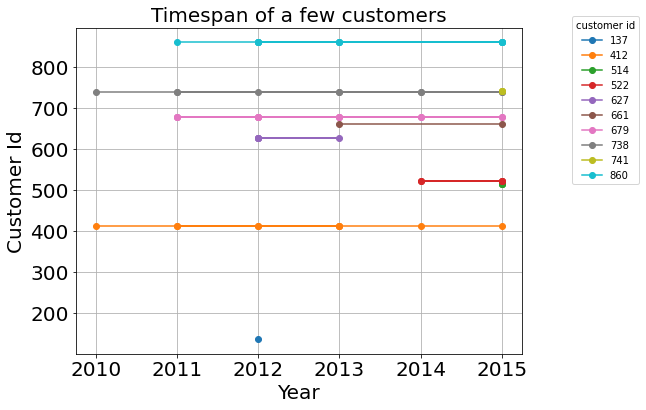

In [ ]:
# group data by customer id
groups = df_sample.groupby('customer_id')

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# plot line for each customer o
for customer_id, group in groups:
    ax.plot(group.year, group.customer_id, marker='o', linestyle='-', label=customer_id)

# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.1, 1.05), title="customer id",)
    
# set titles for figure, x, y
plt.title('Timespan of a few customers',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Customer Id',fontsize=20)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

## Ex 1:
Let's plot another timespan of customers. Take IDs of 5 random customers and make a sample from our df_year using sample() function so that you can make a similar plot with this data.

In [ ]:
# take IDs of 5 random customers
# Get unique values from a list
# using sample() function
# replace '?' signs
sample_customers_ex1 = ? 

# create new sample
df_sample_ex1 = df_year[df_year.customer_id.isin(?)] 

# check ourselves
print(f"We took {len(df_sample_ex1.customer_id.unique())} unique customers")

df_sample_ex1.head()

* <font size="2">**We can note several important things:**
    1. <font size="2">The customers are heterogeneous
    2. <font size="2">They spend at different years
    3.  <font size="2">Also do not purchase every single year.
    
    
* <font size="2">**Now, here we have to make a decision how to define active customers.**</font>
    1. <font size="2">One definition would be to consider in our calculations any customer who kept purchasing (even if in this year he did not purchase anything).  </font>      
    
    2. <font size="2"> Or take into account (per year basis) only a set of customers who were purchasing in the considered year.</font> 
    

* <font size="2">**We will adopt the second approach as it will be more tricky to calculate:**

In [ ]:
# group by customer id
group = df.groupby('customer_id')

# add 3 more columns (min_year, max_year, years_active) to our df 
df['min_year'] = group['year'].transform('min') # get min year
df['max_year'] = group['year'].transform('max') # get max year

df.head()

,transaction_id,transaction_date,customer_id,amount,year,min_year,max_year
0,1,2012-09-04,1,20.96,2012,2012,2012
1,2,2012-05-15,2,10.87,2012,2012,2014
2,3,2014-05-23,2,2.21,2014,2012,2014
3,4,2014-10-24,2,10.48,2014,2012,2014
4,5,2012-10-13,2,3.94,2012,2012,2014


## Ex 2:  

Using min_year, and max_year please calculate the number of active years for each custmer, and put the output in a new column to our df. Name the new column with `years_active`


In [ ]:
# your code goes here, replace '?' sign
df['years_active'] = ?
df.head()

In [ ]:
# define new df for the active customers
active_customers = pd.DataFrame()

# group by two cols 
# group customers by the starting year and the transactional years.
group = df.groupby(['min_year', 'year'])

# start adding cols to active customer df

# number of unique customers for the pairs 
# (starting year, transactional year)
# number of unique customers for each year
active_customers['customers_unique'] = group['customer_id'].unique().apply(lambda x: x.size)

# number of unique transactions for each year
active_customers['transactions_unique'] = group['transaction_id'].unique().apply(lambda x: x.size)

# total amount of money spent in that year
active_customers['amount'] = group['amount'].sum()

#cumulative amount of money spent from previous years till current year
active_customers['cumulative_amount'] = group['amount'].sum().groupby(by='min_year').cumsum()

active_customers.head(6)

customers_unique  ...  cumulative_amount
min_year year                    ...                   
2010     2010               172  ...            2255.07
         2011                93  ...            3613.85
         2012               104  ...            5271.87
         2013                91  ...            6627.43
         2014               103  ...            7922.95
         2015                82  ...            8956.55

[6 rows x 4 columns]

In [ ]:
# Pivot: allows you to transform or reshape data
# index = rows
# columns = cols

# # you can pick any feature to display 
# fillna('') to replace missing values with space
active_customers.reset_index().pivot(index='min_year', columns='year', values='customers_unique').fillna('')

year,2010,2011,2012,2013,2014,2015
min_year,,,,,,
2010,172,93,104,91,103,82.0
2011,,170,92,98,89,88.0
2012,,,163,109,98,90.0
2013,,,,180,103,102.0
2014,,,,,155,90.0
2015,,,,,,160.0


**The second part is to calculate for each year the number of new customers:**

In [ ]:
# now will compute the amount of the new customers in each year
group = df.groupby(['min_year'])

new_customers = pd.DataFrame()
new_customers = group['customer_id'].unique().apply(lambda x: x.size).rename('new_customers')
new_customers.head()

min_year
2010    172
2011    170
2012    163
2013    180
2014    155
Name: new_customers, dtype: int64

**Combine the two datasets active custmers and new customers:**

In [ ]:
# using join to Combine the two datasets:

active_customers = active_customers.join(new_customers, on='min_year')
active_customers.head(6)

customers_unique  ...  new_customers
min_year year                    ...               
2010     2010               172  ...            172
         2011                93  ...            172
         2012               104  ...            172
         2013                91  ...            172
         2014               103  ...            172
         2015                82  ...            172

[6 rows x 5 columns]

<font size="2">**Now, we are ready to calculate several important measures:**
    

1. customer retention rate $=$ $\frac{active\_customers}{new\_ customers}$ 


2. transactions per customer $=$ $\frac{transactions}{active\_customers}$


3. amount per transaction $=$ $\frac{amount}{transactions}$

In [ ]:
# new dataframe to hold different calculations
active_customers_stat = pd.DataFrame()

active_customers_stat = active_customers_stat.assign(
    customers_unique = active_customers['customers_unique'],
    retention = active_customers['customers_unique'] / active_customers['new_customers'], # retention
    trans_per_customer = active_customers['transactions_unique'] / active_customers['customers_unique'],
    amount_per_trans = active_customers['amount'] / active_customers['transactions_unique']
)

active_customers_stat = active_customers_stat.reset_index()
active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans
0,2010,2010,172,1.000000,1.511628,8.673346
1,2010,2011,93,0.540698,1.903226,7.676723
2,2010,2012,104,0.604651,1.875000,8.502667
3,2010,2013,91,0.529070,1.802198,8.265610
4,2010,2014,103,0.598837,1.582524,7.947975


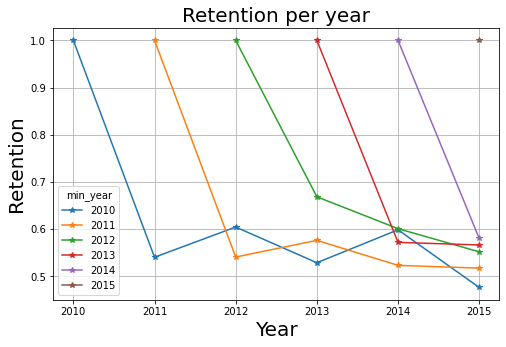

In [ ]:
# here in this plot we look how retention rate change during five years
# plot 
active_customers_stat.pivot(index='year', 
                            columns='min_year', 
                            values='retention').plot(figsize=(8,5), grid=True, style="*-")

# set titles for figure, x, y
plt.title('Retention per year',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Retention',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

Now we can calculate the **historical CLV**, which is cumulative spending per customer over time divided by amount of new customers each year

* historical CLV $=$ $\frac{cumulative\_amount}{new\_customers}$

In [ ]:
# temp = active customers
temp = active_customers.reset_index()

# update active_customers_stat with historicCLV
# we take values from active_customers because we don't store cumulative_amount and new_customers in our stat df
active_customers_stat['historicCLV'] = temp['cumulative_amount'] / temp['new_customers']
active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans,historicCLV
0,2010,2010,172,1.000000,1.511628,8.673346,13.110872
1,2010,2011,93,0.540698,1.903226,7.676723,21.010756
2,2010,2012,104,0.604651,1.875000,8.502667,30.650407
3,2010,2013,91,0.529070,1.802198,8.265610,38.531570
4,2010,2014,103,0.598837,1.582524,7.947975,46.063663


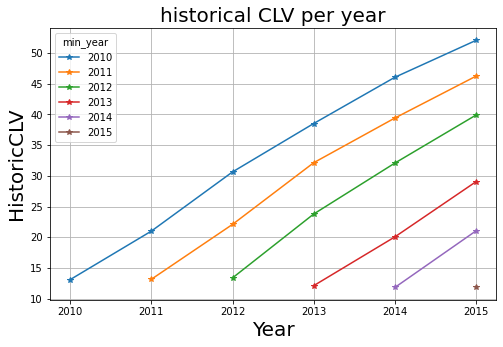

In [ ]:
# pivot
# plot

active_customers_stat.reset_index().pivot(index='year', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="*-")

#
# set titles for figure, x, y
plt.title('historical CLV per year',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

If we want to know just the age of customers in months (e.g we want customers who are 12 months old considered the same instead of separate cohorts), we need to bring it to common scale:

In [ ]:
# add month active
active_customers_stat['months_active'] = (active_customers_stat['year'] - 
                                          active_customers_stat['min_year'] + 1)*12

active_customers_stat.head()

,min_year,year,customers_unique,retention,trans_per_customer,amount_per_trans,historicCLV,months_active
0,2010,2010,172,1.000000,1.511628,8.673346,13.110872,12
1,2010,2011,93,0.540698,1.903226,7.676723,21.010756,24
2,2010,2012,104,0.604651,1.875000,8.502667,30.650407,36
3,2010,2013,91,0.529070,1.802198,8.265610,38.531570,48
4,2010,2014,103,0.598837,1.582524,7.947975,46.063663,60


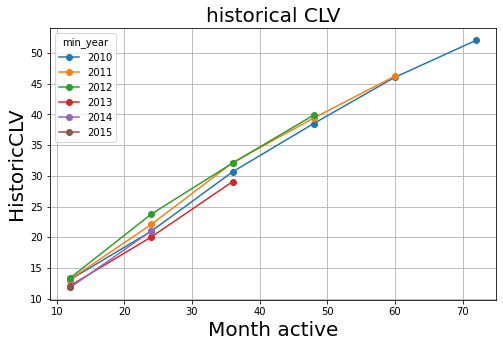

In [ ]:
# pivot, plot
active_customers_stat.reset_index().pivot(index='months_active', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="-o")

# set titles for figure, x, y
plt.title('historical CLV',fontsize=20)
plt.xlabel('Month active', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

We can also calculate weighted averages, where each cohort is weighted by the number of customers:

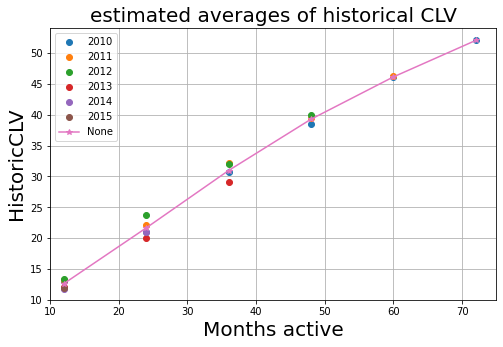

In [ ]:
active_customers_stat['vol'] = active_customers_stat['historicCLV']*active_customers_stat['customers_unique']
weighted_historic_CLV = active_customers_stat.groupby('months_active')

weighted_clv = weighted_historic_CLV['vol'].sum() / weighted_historic_CLV['customers_unique'].sum()

active_customers_stat.reset_index().pivot(index='months_active', 
    columns='min_year', values='historicCLV').plot(figsize=(8,5), grid=True, style="o")

weighted_clv.plot(figsize=(8,5), grid=True, style="*-")

# set titles for figure, x, y
plt.title('estimated averages of historical CLV',fontsize=20)
plt.xlabel('Months active', fontsize=20)
plt.ylabel('HistoricCLV',fontsize=20)
plt.ylim(ymin=10)
plt.xlim(xmin=10)
plt.legend()

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

### 3.2. Apply second method to calculate the CLV using machine learning method.

**Simple Linear regression** Simple or single-variate linear regression is the simplest case of linear regression with a single independent variable, 𝐱 = 𝑥.
    
    
The idea is we need to train our  model using historical data to predict future data. To predict the **current values (to fit the model)**, and use this model for future values?

>We will use Scikit-learn library again for this purpose.

![picture](https://i.ibb.co/BBXgWdB/Regression-steps-3-2.png)


In [ ]:
weighted_clv.head()

months_active
12    12.604520
24    21.648106
36    30.962415
48    39.285518
60    46.147536
dtype: float64

In [ ]:
# sklearn package to apply simple machine learning methods
from sklearn.linear_model import LinearRegression

# define our variables
x = weighted_clv.reset_index().months_active.values.reshape(-1, 1) #independent variable
y = weighted_clv.values.reshape(-1, 1) # dependent variable
# create the model
model = LinearRegression()

![picture](https://i.ibb.co/2S36HZD/Regression-steps-4.png)

In [ ]:
# fit x feature (months active) to y value (CLV)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

![picture](https://i.ibb.co/9WNz4KB/Regression-steps-5.png)

In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
# get coeficient (slope)
print('Model coefficient: ', model.coef_)
# get intercept
print('Model intercept', model.intercept_)

predicted response:
[[13.84658471]
 [21.82268815]
 [29.79879158]
 [37.77489502]
 [45.75099845]
 [53.72710189]]
Model coefficient:  [[0.66467529]]
Model intercept [5.87048128]


That is, model for calculating historical **CLV** using months of activity is:

$CLV = 5.87 + 0.66 * months\_active $

Let's check the model predictions:

![picture](https://i.ibb.co/sP81cwz/Regression-steps-6.png)

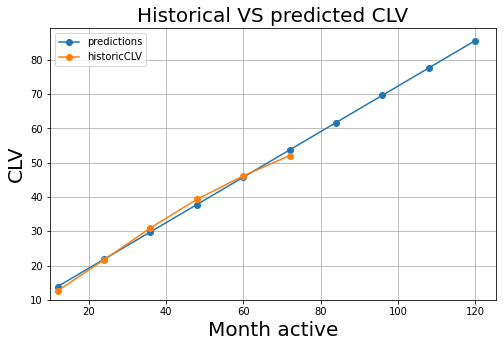

In [ ]:
# sample for our single feature months active x
x = pd.Series(range(12, 125, 12))

# predict new data or unseen data
predictions = model.predict(x.values.reshape(-1, 1))

predicted_clv = pd.DataFrame({'months_active': x, # our independent variable
                              'predictions': predictions.reshape(-1)}) # our dependent variable

predicted_clv.join(
    pd.DataFrame({'historicCLV': weighted_clv}), on='months_active'
).set_index('months_active').plot(figsize=(8,5), grid=True, style="-o")

# set titles for figure, x, y
plt.title('Historical VS predicted CLV',fontsize=20)
plt.xlabel('Month active', fontsize=20)
plt.ylabel('CLV',fontsize=20)
plt.ylim(ymin=10)
plt.xlim(xmin=10)
plt.legend()

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.grid(True)
plt.show()

**Multiple linear regression**

Now, what if we are more ambitious? Our desire is not just to fit general function, but to predict amount spent for each customer. Can we do that? Depends on the data. Assume that we performed a questionnaire upon the registration, collected some clicks on our website and also have information about proposed discounts for some of the customers:

In [ ]:
# read survey dataset
survey = pd.read_csv('lab_04_customer_transact_survey.csv')
survey.head()

,customer_id,gender,age,discount_proposed,clicks_in_eshop
0,1,1,71,0,1
1,2,1,42,1,3
2,3,1,49,1,3
3,4,1,71,0,1
4,5,1,71,0,1


Next step is to think, how to plan our experiment. What we want to predict? We decided to predict for all customers who made transactions in their first year $(t_0)$, what would be the amount of money spent next year $(t_1)$. For that reason we will discard:
    
   1. all customers who do not have the information about $t_1$
   2. all the information about future years $t_k$, where $k>1$

In [ ]:
# read our original transzction dataset
df = pd.read_csv("lab_04_clv_transactions.csv")

# copy the original df
df_year = df 

# we take only year
df_year['year'] = df_year.transaction_date.apply(lambda x: pd.to_datetime(x).date().year) 
df = df_year 

group = df.groupby('customer_id')
df['min_year'] = group['year'].transform('min')
df['max_year'] = group['year'].transform('max')
df['years_active'] = df['max_year'] - df['min_year'] + 1

active_customers = pd.DataFrame()
group = df.groupby(['customer_id', 'year'])

active_customers['transaction_per_customer'] = group['customer_id'].apply(lambda x: x.size)
active_customers['amount_per_customer'] =group['amount'].sum()
active_customers['amount_per_transaction'] = active_customers['amount_per_customer'] / active_customers['transaction_per_customer']
active_customers['min_year'] = group['min_year'].first()
active_customers['years_active'] = group['years_active'].first()

active_customers.head(10)

transaction_per_customer  ...  years_active
customer_id year                            ...              
1           2012                         1  ...             1
2           2012                         2  ...             3
            2013                         2  ...             3
            2014                         4  ...             3
3           2012                         1  ...             4
            2013                         2  ...             4
            2014                         2  ...             4
            2015                         2  ...             4
4           2015                         1  ...             1
5           2015                         2  ...             1

[10 rows x 5 columns]

In [ ]:
dff = active_customers.rename_axis(['customer_id', 'year']).reset_index()

# more than one year active
dff =  dff.loc[dff['years_active'] > 1]

grouped = dff.groupby('customer_id')

# new dataframe for new features.
newdf = pd.DataFrame()

newdf['transaction_per_customer_1'] = grouped['transaction_per_customer'].first()
newdf['amount_per_customer_1'] = grouped['amount_per_customer'].first() # first year
newdf['amount_per_transaction_1'] = grouped['amount_per_transaction'].first()
newdf['amount_per_customer_2'] = grouped['amount_per_customer'].apply(lambda x: x.values[1]) # second yaer
newdf = newdf.rename_axis(['customer_id']).reset_index()
newdf.head(10)

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,amount_per_customer_2
0,2,2,14.81,7.405000,15.12
1,3,1,21.58,21.580000,25.35
2,7,2,26.46,13.230000,8.08
3,8,1,6.21,6.210000,2.35
4,9,3,19.21,6.403333,11.46
5,10,1,12.37,12.370000,5.99
6,12,3,47.09,15.696667,4.78
7,13,2,10.17,5.085000,59.67
8,14,1,28.72,28.720000,10.08
9,15,2,24.47,12.235000,5.14


In [ ]:
model_data = newdf.merge(survey, on='customer_id', how='left')
model_data['gender'] = model_data.gender.astype('category')
model_data['discount_proposed'] = model_data.discount_proposed.astype('category')
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customer_id                 657 non-null    int64   
 1   transaction_per_customer_1  657 non-null    int64   
 2   amount_per_customer_1       657 non-null    float64 
 3   amount_per_transaction_1    657 non-null    float64 
 4   amount_per_customer_2       657 non-null    float64 
 5   gender                      657 non-null    category
 6   age                         657 non-null    int64   
 7   discount_proposed           657 non-null    category
 8   clicks_in_eshop             657 non-null    int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 42.5 KB


In [ ]:
# features
x = model_data.loc[:, model_data.columns != 'amount_per_customer_2']
x

,customer_id,transaction_per_customer_1,amount_per_customer_1,amount_per_transaction_1,gender,age,discount_proposed,clicks_in_eshop
0,2,2,14.81,7.405000,1,42,1,3
1,3,1,21.58,21.580000,1,49,1,3
2,7,2,26.46,13.230000,0,42,0,1
3,8,1,6.21,6.210000,0,28,0,1
4,9,3,19.21,6.403333,1,42,0,1
...,...,...,...,...,...,...,...,...
652,994,1,2.45,2.450000,1,18,0,1
653,997,1,7.93,7.930000,0,42,0,1
654,998,1,16.14,16.140000,0,24,1,4
655,999,2,2.05,1.025000,0,42,1,3


In [ ]:
# target
y = model_data[['amount_per_customer_2']]
y

,amount_per_customer_2
0,15.12
1,25.35
2,8.08
3,2.35
4,11.46
...,...
652,5.45
653,11.88
654,59.48
655,13.61


###About train/test split

![picture](https://www.researchgate.net/profile/Brian_Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
# mean square error is the mean of squared distance between predicted value and the original value,a=p, b=o, (a-b)**2,mean
#a-b
#median: a-b, median absolute
X = x
y = y

# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

![picture](https://i.ibb.co/9WNz4KB/Regression-steps-5.png)

In [ ]:
# make an instance from the lr model
lin_reg_mod = LinearRegression()

# train the model - teach the model
lin_reg_mod.fit(X_train, y_train)

# predict unseen data (test dat)
pred = lin_reg_mod.predict(X_test)

![picture](https://i.ibb.co/sP81cwz/Regression-steps-6.png)

In [ ]:
# Evaluate the lr model
# MAE
test_set_mae = median_absolute_error(y_test, pred)
# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
#R^2
test_set_r2 = r2_score(y_test, pred)
#MSE
test_set_mse = (mean_squared_error(y_test, pred))

print("mean squared error is: ", test_set_mse)
print("root mean squared error is: ", test_set_rmse)
print("mean absolute error is: ", test_set_mae)
print("rscore: ", test_set_r2)

mean squared error is:  25.85661354806587
root mean squared error is:  5.084939876543858
mean absolute error is:  2.760787031493546
rscore:  0.8504003133874143


In [ ]:
print('coef: ', lin_reg_mod.coef_)
print('\nintercept: ', lin_reg_mod.intercept_)

coef:  [[-1.41464813e-04  2.50016299e-01 -2.37115657e-04 -2.38937762e-02
  -2.89772698e-01  2.24908103e-01 -3.66101256e+01  2.38878044e+01]]

intercept:  [-25.43919346]


## Ex 3:
Split our data into 60/40% ratio of train and test data (we want to use 60% of df for training and 40% for test).
Then create Linear Regression model, fit the data into this model and make predictions.

In [ ]:
# TODO: replace '?' signs
X_train, X_test, y_train, y_test = ?(X, y, test_size = ?, random_state=9)

# make an instance from the lr model
lin_reg_mod = ?

# train the model - teach the model
lin_reg_mod.fit(?,?)

# predict unseen data
pred = lin_reg_mod.predict(?)

This code is to evaluate our new model from the exercise. There's no need to make any changes in here.

In [ ]:
# Evaluate the lr model
# MAE
test_set_mae = median_absolute_error(y_test, pred)
# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
#R^2
test_set_r2 = r2_score(y_test, pred)
#MSE
test_set_mse = (mean_squared_error(y_test, pred))

print("mean squared error is: ", test_set_mse)
print("root mean squared error is: ", test_set_rmse)
print("mean absolute error is: ", test_set_mae)
print("rscore: ", test_set_r2)

mean squared error is:  23.832099463567907
root mean squared error is:  4.88181313279891
mean absolute error is:  2.8086562828536614
rscore:  0.8330533335859078
